# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.stats.proportion as props

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
print(data.shape)
# number of callbacks for black-sounding names
print(sum(data[data.race=='w'].call))
print(sum(data[data.race=='b'].call))

(4870, 65)
235.0
157.0


In [4]:
print('For white sounding names')
print('     Number of names: {}'.format(len(data.loc[data.race == 'w'])))
print('     Number of call backs: {}'.format(sum(data[data.race=='w'].call)))
print('     Number of fails: {}'.format(len(data.loc[(data.call == 0) & (data.race=='w')])))
print('For black sounding names')
print('     Number of names: {}'.format(len(data.loc[data.race == 'b'])))
print('     Number of call backs: {}'.format(sum(data[data.race=='b'].call)))
print('     Number of fails: {}'.format(len(data.loc[(data.call == 0) & (data.race=='b')])))
data.loc[(data.call == 0) & (data.race=='w'),['id','call','race','firstname']].head()
#data.columns

For white sounding names
     Number of names: 2435
     Number of call backs: 235.0
     Number of fails: 2200
For black sounding names
     Number of names: 2435
     Number of call backs: 157.0
     Number of fails: 2278


,id,call,race,firstname
0,b,0.0,w,Allison
1,b,0.0,w,Kristen
4,b,0.0,w,Carrie
5,b,0.0,w,Jay
6,b,0.0,w,Jill


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

## Q1 What test is appropriate for this problem? Does CLT apply?

This needs a two sample, population proportion using z statistics.

The sample size is 2435 for both white and black sounding names.
 - The proportion of white sounding names that got call backs (ie were successful) = 235/2435
 - The proportion of black sounding names that got call backs (ie were successful) = 157/2435

We want to know if this difference in proportion is statistically significant - might it have been seen in our sample by chance.

Conditions for statistical significance test:
 - The Random condition - race was assigned randomly
 - The Independence condition - sample less than 10% of population - n is less than 10% of the population 
 - The Normal condition - np and n(1-p) both need to be >= 10 ie at least 10 failures and 10 successes (calculate assuming H0 is correct) - our data has more than 10 success' and failures in each group.

The CLT is not relevant here as we are dealing with a population proportion not a mean.

## Q2 What are the null and alternate hypotheses?

- Null Hypothesis: The proportion of call backs received by black and white sounding names is the same ie $p_w-p_b = 0$
- Alt Hypothesis: The proportion of call backs received by black is lower than by whites (1 tail) ie $p_w-p_b > 0$

I'll use a 95% confidence interval or alpha of 0.95

## Q3 Compute margin of error, confidence interval, and p-value. 
Try using both the bootstrapping and the frequentist statistical approaches.

In [5]:
w = data[data.race=='w']
b = data[data.race=='b']

In [6]:
# Your solution to Q3 here

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

## Using Frequentist approach, (from first principles)

In [7]:
# calculating standard stats for the populations
calls_w = sum(data[data.race=='w'].call)
calls_b = sum(data[data.race=='b'].call)

p_w = calls_w/len(w)
sd_w = p_w * (1-p_w)

p_b = calls_b/len(b)
sd_b = p_b * (1-p_b)

print('For w mean/proportion: {:.4}, success :{}, n : {}, standard deviation: {:.5}'.format(
    p_w, calls_w, len(w), sd_w))
print('For b mean/proportion: {:.4}, success :{}, n : {}, standard deviation: {:.5}'.format(
    p_b, calls_b, len(b), sd_b))

p_comb = (calls_b+calls_w)/(len(b)+len(w))
print('\nFor combined mean/proportion: {:.4}, success :{}, n : {}, standard deviation: {:.5}'.format(
    p_comb, calls_b+calls_w, len(b)+len(w),p_comb* (1-p_comb)))

For w mean/proportion: 0.09651, success :235.0, n : 2435, standard deviation: 0.087195
For b mean/proportion: 0.06448, success :157.0, n : 2435, standard deviation: 0.060319

For combined mean/proportion: 0.08049, success :392.0, n : 4870, standard deviation: 0.074014


In [8]:
# calculating standard stats distributions of any x samples from the original pop
pbar_w = p_w
var_pbar_w = (p_w*(1-p_w))/len(w)
sd_pbar_w = np.sqrt(var_pbar_w)

pbar_b = p_b
var_pbar_b = (p_b*(1-p_b))/len(b)
sd_pbar_b = np.sqrt(var_pbar_b)

# We are interested in p_w-p_b
p_pwpb = p_w - p_b
print('Observed difference in proportion of call backs: {:.5}'.format(p_pwpb))
sd_pwpb = np.sqrt(var_pbar_w + var_pbar_b)
print('The standard error: {:.5}'.format(sd_pwpb))

crit_z = stats.norm.ppf(0.95)
print('\ncrit_z at 1 tail 95% confidence: {:.5}'.format(crit_z))
[ciu,cil] = crit_z*sd_pwpb*np.array([-1,1])
print('\nThe difference in proportion of people reciving call backs: {:.4} +/- {:.4}'.format(
    p_pwpb, crit_z*sd_pwpb))
print('With 95% confidence interval for the proportion of w - proportion of b is {:.4} to {:.4}'.format(
    p_pwpb+ciu,p_pwpb+cil))
print('\nthe margin of error on our observation at 95% confidence (1 tail) is {:.4}'.format(crit_z*sd_pwpb))

p_comb = (calls_w+calls_b)/(len(w)+len(b))
z_test = (p_pwpb-0)/np.sqrt((p_comb*(1-p_comb))/len(w) + (p_comb*(1-p_comb))/len(b))
print('test statistic (z-score): {:.5}'.format(z_test))
print('p value: {:.6f}'.format(stats.norm.sf(abs(z_test))))

Observed difference in proportion of call backs: 0.032033
The standard error: 0.0077834

crit_z at 1 tail 95% confidence: 1.6449

The difference in proportion of people reciving call backs: 0.03203 +/- 0.0128
With 95% confidence interval for the proportion of w - proportion of b is 0.01923 to 0.04484

the margin of error on our observation at 95% confidence (1 tail) is 0.0128
test statistic (z-score): 4.1084
p value: 0.000020


The fact that 0 is outside the 95% confidence interval, and the p-value is way below the 95% confidence critical z value of 1.96 indicates that these results are statistically significant and it is highly unlikely that we would see the difference in proportions by chance

## Using Frequentist approach, (using pre-built tests)
(using statsmodels.stats.proportion.proportions_ztest)

In [9]:
(z_test2, p2) = props.proportions_ztest([calls_w, calls_b],[len(w),len(b)],
                                        alternative='larger')
print('test statistic (z-score, calculated using proportions_ztest()): {:.5}'.format(z_test2))
print('p value: {:.6f}'.format(p2))


test statistic (z-score, calculated using proportions_ztest()): 4.1084
p value: 0.000020


## Using Frequentist approach, (using Bootstrapping)
Using a permutation test - ie sampling a random assignment of 'race' to the results and then comparing how many times our bootstrapped sample gets 157 or less call backs

In [10]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    data = np.concatenate((data_1, data_2))
    perm_reps = np.empty(size)
    for i in range(size):
        permuted_data = np.random.permutation(data)
        p_sam_1, p_sam_2 = permuted_data[:len(data_1)], permuted_data[len(data_1):]
        perm_reps[i] = func(p_sam_1, p_sam_2)
    return perm_reps

Our observed data showed 78.0 difference in call backs


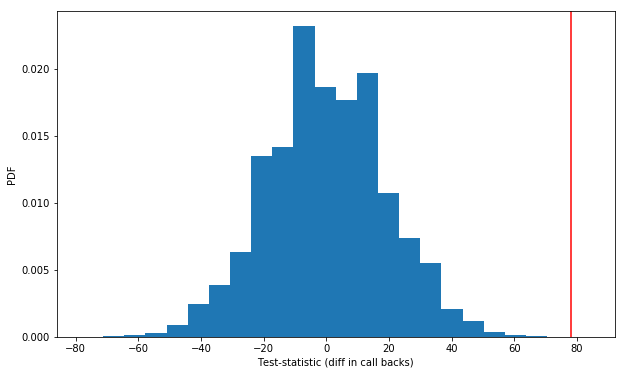

In [11]:
def diff_in_calls(data_1, data_2):
    return np.sum(data_1)-np.sum(data_2)

empirical_obs = diff_in_calls(w.call, b.call)
print('Our observed data showed {} difference in call backs'.format(empirical_obs))

perm_reps_cd = draw_perm_reps(w.call, b.call, diff_in_calls, 100000)

plt.rcParams["figure.figsize"] = (10,6)
fig, ax = plt.subplots()
ax.hist(perm_reps_cd, density=True, bins=24)
ax.axvline(empirical_obs, color='red')
ax.set_xlabel('Test-statistic (diff in # of call backs)')
ax.set_ylabel('PDF')
plt.show()

In [12]:
# Compute p-value: p
p_cd = np.sum(perm_reps_cd >= empirical_obs) / len(perm_reps_cd)
print('p-value = {:.5f}'.format(p_cd))
print('{} bootstraped replications had as or more extreme a result than our observed result'.format(
    np.sum(perm_reps_cd >= empirical_obs)))

p-value = 0.00003
3 bootstraped replications had as or more extreme a result than our observed result


In [13]:
std_err_cd = np.std(perm_reps_cd)
print('The standard error of our bootstrapped data is {:.4}'.format(std_err_cd))

crit_z = stats.norm.ppf(0.975)
print('\ncrit_z at 2 tail 95% confidence: {:.5}'.format(crit_z))

nf_moe_cd = crit_z*std_err_cd
print('The margin of error at 95% confidence: {:.4}'.format(nf_moe_cd))

[ciu_c,cil_c] = nf_moe_cd*np.array([-1,1])
print('\nIf H0 is true and there is no difference between the populations with 95% confidence we expect: {} +/- {:.5}'.format(
    0, nf_moe_cd))
print('With 95% confidence interval for the proportion of w - proportion of b is {:.4} to {:.4}'.format(
    0+ciu_c,0+cil_c))

The standard error of our bootstrapped data is 18.95

crit_z at 2 tail 95% confidence: 1.96
The margin of error at 95% confidence: 37.14

If H0 is true and there is no difference between the populations with 95% confidence we expect: 0 +/- 37.145
With 95% confidence interval for the proportion of w - proportion of b is -37.14 to 37.14


## Repeating the bootstrap analysis using the proportion statistic rather than absolute calls

Our observed data showed 0.032033 difference in call backs


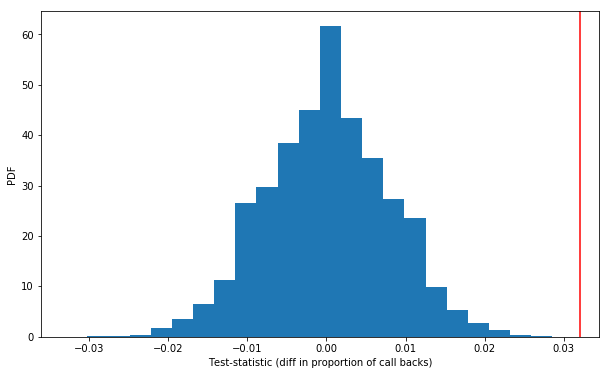

In [14]:
def diff_in_proportion_of_calls(data_1, data_2):
    return np.sum(data_1)/len(data_1)-np.sum(data_2)/len(data_2)

empirical_obs = diff_in_proportion_of_calls(w.call, b.call)
print('Our observed data showed {:.5} difference in call backs'.format(empirical_obs))

perm_reps = draw_perm_reps(w.call, b.call, diff_in_proportion_of_calls, 100000)

fig, ax = plt.subplots()
ax.hist(perm_reps, density=True, bins=24)
ax.axvline(empirical_obs, color='red')
ax.set_xlabel('Test-statistic (diff in proportion of call backs)')
ax.set_ylabel('PDF')
plt.show()

In [15]:
# Compute p-value: p
p = np.sum(perm_reps >= empirical_obs) / len(perm_reps)
print('p-value = {:.5f}'.format(p))
print('{} bootstraped replications had as or more extreme a result than our observed result'.format(
    np.sum(perm_reps >= empirical_obs)))

p-value = 0.00000
0 bootstraped replications had as or more extreme a result than our observed result


In [16]:
std_err = np.std(perm_reps)
print('The standard error of our bootstrapped data is {:.5}'.format(std_err))

z_score = stats.norm.ppf(p)
print('Z-score for our observation: {:.4}'.format(abs(z_score)))

crit_z = stats.norm.ppf(0.95)
print('\ncrit_z at 1 tail 95% confidence: {:.4}'.format(crit_z))

nf_moe = crit_z*std_err
print('The margin of error at 95% confidence: {:.4}'.format(nf_moe))


[ciu,cil] = nf_moe*np.array([-1,1])
print('\nIf H0 is true and there is no difference between the populations with 95% confidence we expect: {} +/- {:.4}'.format(
    0, nf_moe))
print('With 95% confidence interval for the proportion of w - proportion of b is {:.4} to {:.4}'.format(
    0+ciu,0+cil))

The standard error of our bootstrapped data is 0.0078151
Z-score for our observation: inf

crit_z at 1 tail 95% confidence: 1.645
The margin of error at 95% confidence: 0.01285

If H0 is true and there is no difference between the populations with 95% confidence we expect: 0 +/- 0.01285
With 95% confidence interval for the proportion of w - proportion of b is -0.01285 to 0.01285


## Q4 Write a story describing the statistical significance in the context or the original problem.

Finding a job is hard. Just getting noticed and being given a chance to impress is hard - your resume has to shine. But thankfully we live in a meritocracy, so long as I work hard, write a great summary of what I've done in my resume, the best person for a job will be chosen.

This data set out to test that assumption. Resumes were put together and sent to employers, just before sending the first name of the potential employee was selected, randomly assigning a 'black' sounding name or a 'white' sounding name. If we truly live in a meritocracy the name of the applicant will have no effect on the proportion of resumes being selected for the next round - or getting a 'call'. 

The proportion with 'white' names - the proportion with 'black' names will be 0.

So what did we find?

In [17]:
print('Observed difference in call back rate: {:.5f}'.format(p_w - p_b))
pd.DataFrame({'# resumes sent':[len(w), len(b)],
              '# call backs':[calls_w, calls_b],
              'as a proportion':[p_w, p_b],
              'Std deviation':[sd_w,sd_b]}, index=['White sounding names','Black sounding names'])

Observed difference in call back rate: 0.03203


,# resumes sent,# call backs,as a proportion,Std deviation
White sounding names,2435,235.0,0.096509,0.087195
Black sounding names,2435,157.0,0.064476,0.060319


our resumes with white sounding names received 235-157 = **78** more calls

But is this difference statistically significant or is it easily possible for this difference to have occurred by pure chance?

To find out we ran a 2 sample statistical z test this is a test where we assumed that the difference in the call back proportion is 0, then take two random sample populations (b & w) and calculated the proportion of people getting calls in these new samples and hence the difference. We calculate the test statistic. We do this many many times or in fact use the mathematically derived formulas for calculating the distribution of our test statistic we will see. We then plot the actual observed value - ie the 78 call difference we measured and see how likely it is to happen.

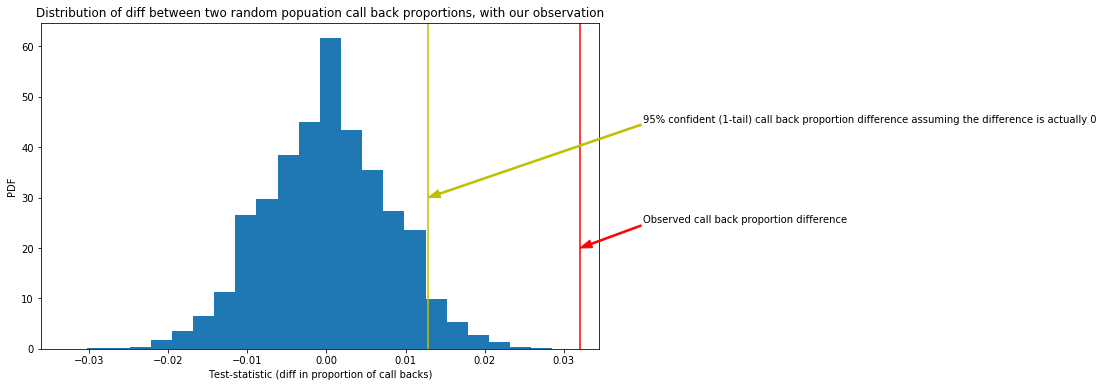

test statistic (z-score, calculated using proportions_ztest()): 4.1084
p value: 0.000020


In [18]:
fig, ax = plt.subplots()
ax.hist(perm_reps, density=True, bins=24)
ax.axvline(empirical_obs, color='red')
ax.axvline(nf_moe, color='y')
ax.set_xlabel('Test-statistic (diff in proportion of call backs)')
ax.set_ylabel('PDF')
ax.set_title('Distribution of diff between two random popuation call back proportions, with our observation')
plt.annotate('Observed call back proportion difference', xy=((p_w - p_b), 20), xytext=(0.04, 25), arrowprops={
    'color':'r', 'width':1.5, 'headwidth':8})
plt.annotate('95% confident (1-tail) call back proportion difference assuming the difference is actually 0', xy=(
    (nf_moe), 30), xytext=(0.04, 45), arrowprops={
    'color':'y', 'width':1.5, 'headwidth':8})
plt.show()


(z_test2, p2) = props.proportions_ztest([calls_w, calls_b],[len(w),len(b)],
                                        alternative='larger')
print('test statistic (z-score, calculated using proportions_ztest()): {:.5}'.format(z_test2))
print('p value: {:.6f}'.format(p2))

In statistical terms this is more than 4 standard deviations from the mean and so is highly un-likely to have happened by chance. We can be 95% confident that this result could not have happen by pure chance. Applicants with black sounding names are less likely to be called into interview than applicants with white sounding names.

## Q5: Does your analysis mean that race/name is the most important factor in callback success? 
Why or why not? 
If not, how would you amend your analysis?

The analysis I completed didn't look at any factor other than race and call back rate, so no conclusion can be drawn about relative importance of this factor to any other factor. We assumed that the same resumes were sent with just the name changed - ie properly (identically) matched pairs of resumes, however that was not actually confirmed as part of the experimental design. If other factors such as experience or prior work history were not correctly controlled for we could easily draw incorrect assumptions.

To explore these other factors further more reading/exploration of the data collection methodology could be completed as well as exploration of some of the other factors in the data set and how they correlate with the call back rate also.

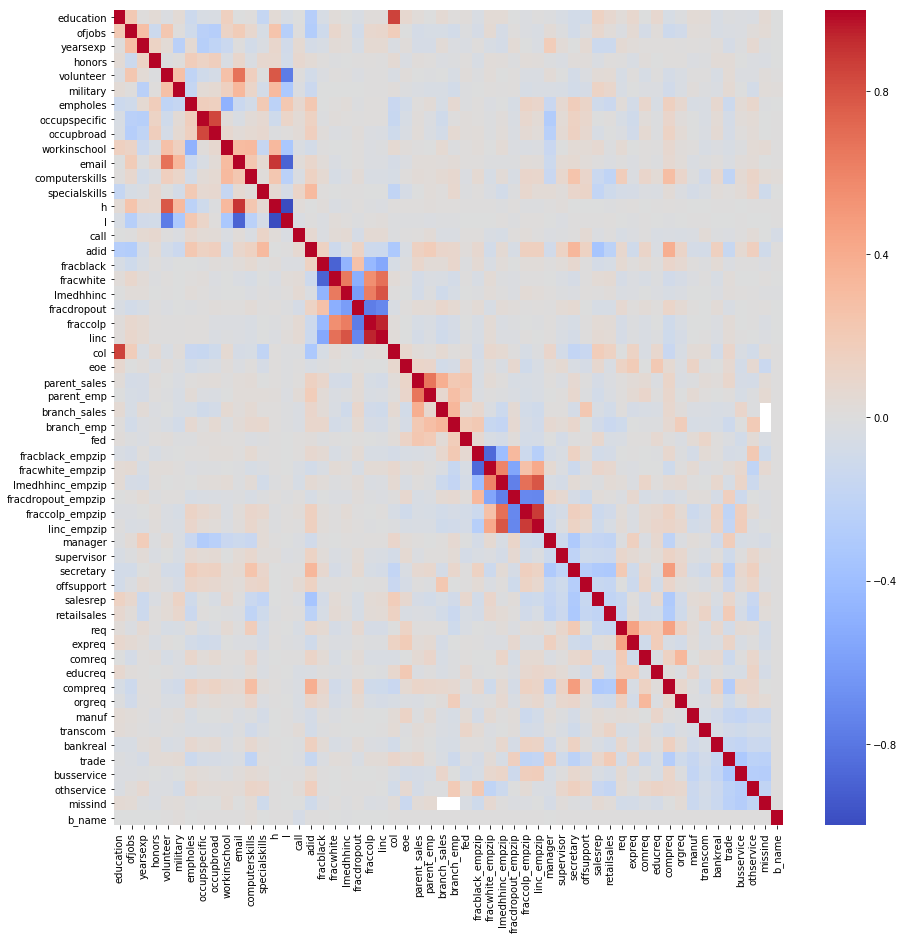

In [19]:
plt.rcParams["figure.figsize"] = (15,15)
# calculate the correlation matrix
df_corr = data
df_corr['b_name'] = 0
df_corr.loc[data.race == 'b','b_name'] = 1

corr = df_corr.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='coolwarm')
plt.show()

In [23]:
pd.options.display.float_format = '{:.5f}'.format
corr[['b_name', 'call']].sort_values('call')

,b_name,call
b_name,1.00000,-0.05887
fracdropout,-0.00432,-0.05667
lmedhhinc_empzip,0.00000,-0.04988
req,-0.00000,-0.04170
educreq,0.00000,-0.03386
orgreq,-0.00000,-0.03342
fracwhite_empzip,0.00000,-0.03299
branch_sales,0.00000,-0.02913
computerskills,0.03104,-0.02881
manuf,-0.00000,-0.02879


Although the most negatively correlated feature with receiving a 'call' was having a 'black' sounding name there are at least two categories that were relatively strongly correlated with getting a call but that were negatively correlated with having a black sounding name - specifically 'honors' and 'empholes'. It is also worth noticing that having a 'specialskills' was the strongest feature correlated with receiving a call and this also was negatively correlated with having a black sounding name. These independent feature need to be correctly controlled for before strong conclusions can be draw that it is indeed your name that most strongly affects the likelihood you will receive a call back for a job.